In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df= pd.read_csv("clean_PCOS_data.csv")

In [2]:
df.dtypes

Patient_File_No.                   int64
PCOS(Y/N)                          int64
Age (yrs)                          int64
Weight(Kg)                       float64
Height(Cm)                       float64
BMI                              float64
Blood_Group                        int64
Pulse rate(bpm)                    int64
Respiration_Rate(breaths/min)      int64
Hemoglobin(g/dl)                 float64
Cycle(Reg/Irreg)                   int64
Cycle_Length(days)                 int64
Marital_Years                    float64
Pregnant(Y/N)                      int64
Abortion_Count                     int64
FSH(mIU/mL)                      float64
LH(mIU/mL)                       float64
FSH/LH                           float64
Hip(inch)                          int64
Waist(inch)                        int64
Waist:Hip_Ratio                  float64
TSH(mIU/L)                       float64
AMH(ng/mL)                       float64
PRL(ng/mL)                       float64
Vit_D3(ng/mL)   

In [3]:
df.head()

,Patient_File_No.,PCOS(Y/N),Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
0,1,0,28,44.6,152.0,19.3,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.5,24.9,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.0,25.3,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.0,29.7,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.0,20.1,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [4]:
X = df.drop(columns=['PCOS(Y/N)']) 
y = df['PCOS(Y/N)']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8715596330275229
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       0.85      0.69      0.76        32

    accuracy                           0.87       109
   macro avg       0.86      0.82      0.84       109
weighted avg       0.87      0.87      0.87       109



In [5]:
X_train.head()

,Patient_File_No.,Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),Cycle(Reg/Irreg),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
244,245,39,104.0,164.4,38.5,15,72,18,12.0,0,...,1,1.0,0,120,80,9,7,16.0,13.0,9.6
540,541,23,82.0,165.0,30.1,13,80,20,10.2,1,...,1,1.0,0,120,70,9,10,19.0,18.0,6.9
417,418,32,71.8,162.0,27.4,11,72,18,10.8,0,...,1,0.0,1,120,80,3,3,14.0,13.0,9.0
509,510,46,54.0,152.0,23.4,13,74,20,11.0,0,...,0,1.0,0,120,70,20,18,18.0,17.0,7.8
353,354,30,55.0,164.0,20.4,13,74,22,10.2,0,...,1,1.0,0,110,80,6,4,13.0,15.0,5.6


In [6]:
X_test.head()

,Patient_File_No.,Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),Cycle(Reg/Irreg),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
229,230,28,74.3,154.0,31.3,13,72,18,10.7,0,...,0,1.0,0,110,80,6,5,14.0,13.0,8.5
73,74,26,70.0,163.0,26.3,15,72,18,10.5,0,...,0,0.0,0,110,80,3,4,10.5,6.0,9.8
352,353,27,60.0,164.0,22.3,15,72,18,10.7,0,...,0,1.0,0,120,80,4,5,15.0,18.0,8.0
86,87,31,64.0,156.0,26.3,15,74,18,12.1,1,...,0,0.0,0,120,80,8,10,15.0,13.0,10.0
470,471,34,52.0,149.0,23.4,13,80,20,12.0,1,...,0,1.0,1,110,80,8,10,17.0,20.0,7.0


In [7]:
# Initializing lists to store results
kernels = ['Linear', 'Polynomial', 'RBF']
accuracies = []
confusion_matrices = []

# Defining parameters for each kernel
parameters = [
    {'kernel': 'linear', 'C': 1},
    {'kernel': 'poly', 'C': 1, 'degree': 3},  # Polynomial kernel with degree 3
    {'kernel': 'rbf', 'C': 1, 'gamma': 'scale'}  # RBF kernel with default gamma
]

for params in parameters:
    svm_model = SVC(**params, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculating confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

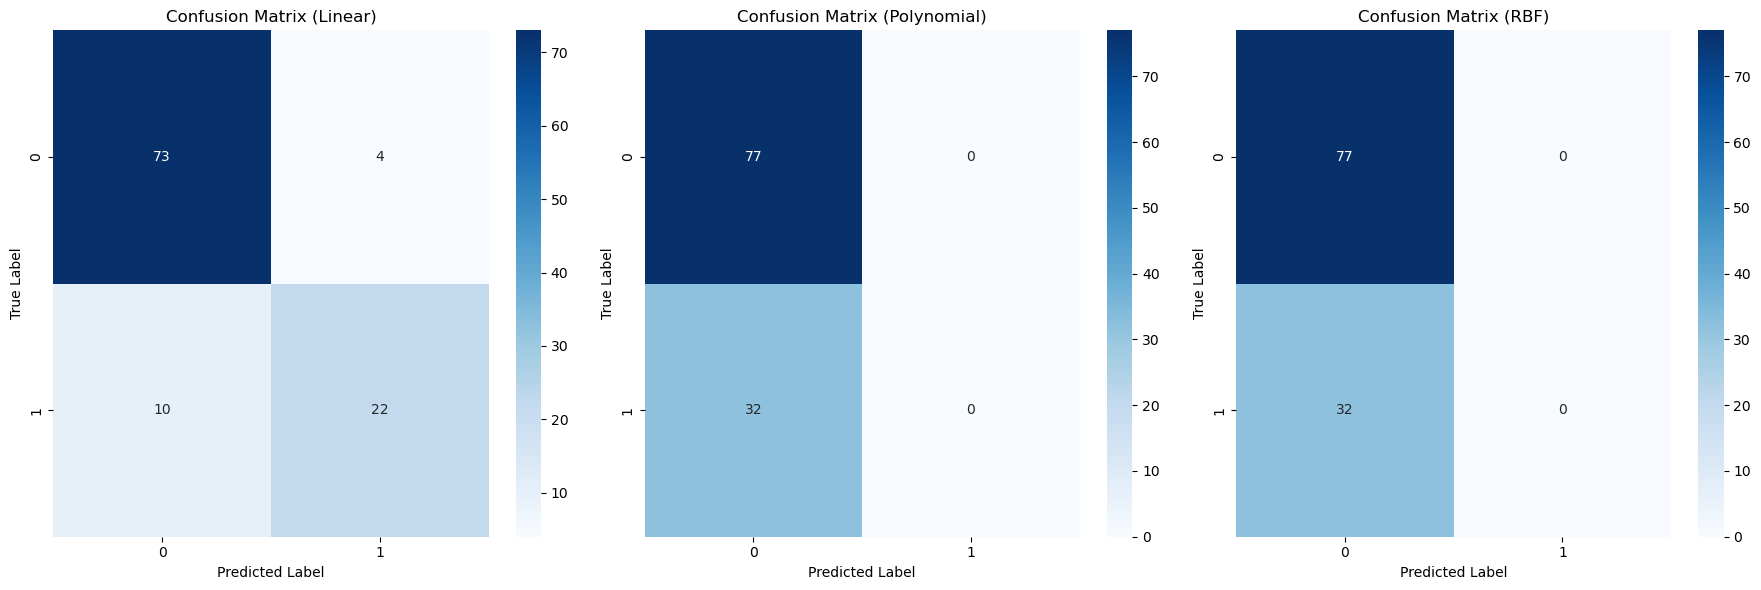

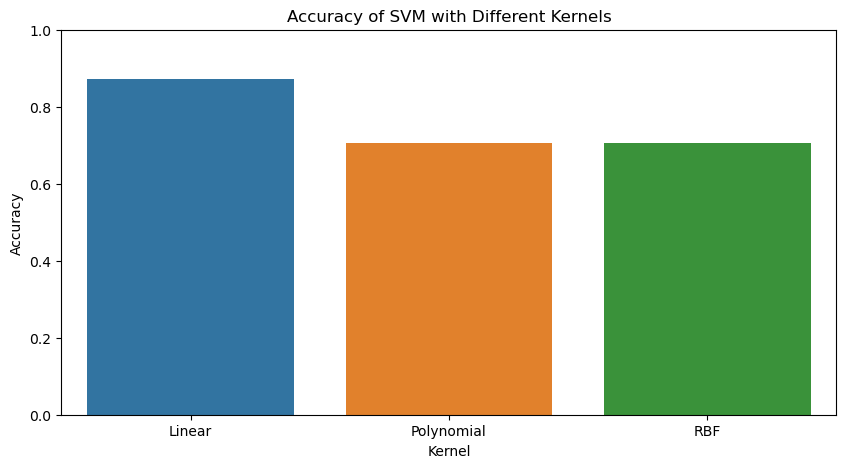

In [8]:
# Visualizing confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  
for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix ({kernels[i]})')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout()
plt.show()

# Visualizing accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=kernels, y=accuracies)
plt.title('Accuracy of SVM with Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.show()

In [9]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

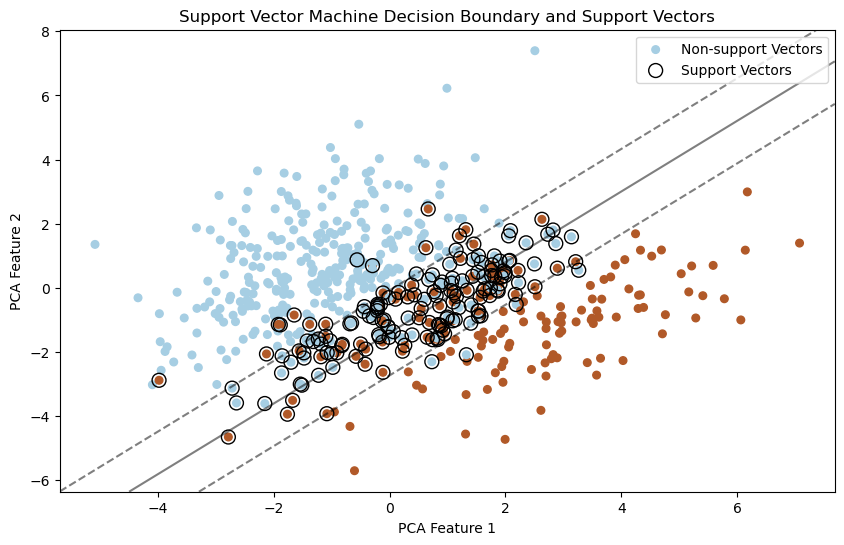

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Training the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_pca, y)

# Plotting the points and the support vectors
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, cmap=plt.cm.Paired, label='Non-support Vectors')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()

# Plotting the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plotting decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Support Vector Machine Decision Boundary and Support Vectors')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()